In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Markdown

from mylib.lib import (
    log_func,
    scatter_plot,
    generate_general_markdown,
    summary_statistics,
)

In [2]:
file = "https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/World_Development_Indicators/wdi_small_tidy_2015.csv"
x_log = "Log GDP per capita (constant 2010 US$)"
x = "GDP per capita (constant 2010 US$)"
y = "Mortality rate, infant (per 1,000 live births)"
title = "Log GDP and Under-5 Mortality"
plot = "plot.png"
df = pd.read_csv(file)

In [3]:
sum_x = summary_statistics(df, x)

assert sum_x.iloc[1] == df[x].mean()
assert sum_x.iloc[2] == df[x].std()
assert sum_x.iloc[3] == df[x].min()
assert sum_x.iloc[4] == df[x].quantile(0.25)
assert sum_x.iloc[5] == df[x].quantile(0.50)
assert sum_x.iloc[6] == df[x].quantile(0.75)
assert sum_x.iloc[7] == df[x].max()

print(sum_x)

count       198.000000
mean      15335.724729
std       22881.307340
min         228.432544
25%        1844.387439
50%        6134.939066
75%       17654.996438
max      189464.583635
Name: GDP per capita (constant 2010 US$), dtype: float64


In [4]:
df = log_func(df, x_log)
assert (df[x_log] == np.log(df[x_log[4:]])).any()
summary_statistics(df, x_log)

count    198.000000
mean       8.699565
std        1.468044
min        5.431241
25%        7.519872
50%        8.721750
75%        9.778706
max       12.151957
Name: Log GDP per capita (constant 2010 US$), dtype: float64

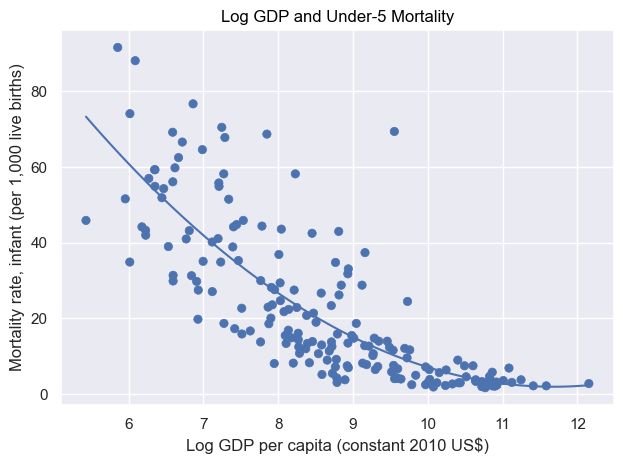

In [5]:
# add a condition for jupyter to go .show()
scatter_plot(df, x_log, y, title)
assert os.path.isfile("images/plot.png")

In [6]:
# add a condition for jupyter to go print()
generate_general_markdown(df, x, y)
with open("Data_summary.md", "r") as file:
    display(Markdown(file.read()))
assert os.path.isfile("Data_summary.md")

### Describe GDP per capita (constant 2010 US$):
| Statistics | Value |
| ----- | ----- |
| count | 198.00 |
| mean | 15335.72 |
| std | 22881.31 |
| min | 228.43 |
| 25% | 1844.39 |
| 50% | 6134.94 |
| 75% | 17655.00 |
| max | 189464.58 |


### Describe Mortality rate, infant (per 1,000 live births):
| Statistics | Value |
| ----- | ----- |
| count | 193.00 |
| mean | 23.40 |
| std | 21.06 |
| min | 1.70 |
| 25% | 6.50 |
| 50% | 15.50 |
| 75% | 35.10 |
| max | 91.60 |


![scatter_plot](images/plot.png)
